In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [4]:
train

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,b,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,...,2.859,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249996,349996,b,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,...,-0.867,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249997,349997,s,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,...,-2.890,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992
249998,349998,b,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,...,0.811,112.718,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [5]:
train.columns

Index(['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [6]:
data: 80, 10, 10


SyntaxError: invalid syntax (<ipython-input-6-7fca1da7c29d>, line 1)

In [16]:
train['Prediction'].value_counts()

b    164333
s     85667
Name: Prediction, dtype: int64

In [14]:
train['PRI_jet_num'].value_counts()

0    99913
1    77544
2    50379
3    22164
Name: PRI_jet_num, dtype: int64

In [11]:
train.iloc[:, 23]

0         258.733
1         164.546
2         260.414
3          86.062
4          53.131
           ...   
249995    144.665
249996     80.408
249997    198.907
249998    112.718
249999     99.405
Name: PRI_met_sumet, Length: 250000, dtype: float64

In [6]:
test['Prediction'].value_counts()

?    568238
Name: Prediction, dtype: int64

In [33]:
with open('../data/lambda_poly_plots_data20211101-044734.txt', 'r') as f:
    x = json.loads(f.read())

with open('../data/lambda_poly_plots_data20211101-105038.txt', 'r') as f:
    y = json.loads(f.read())

for i, v in enumerate(x):
    x[i] += y[i]
    
print(len(x))

4


In [25]:
from collections import OrderedDict

In [39]:
accuracies = [[{}, {}, {}] for i in range(len(x))]


for model_number in range(len(x)):
    for run_number in range(len(x[model_number])):
        config, accuracy = x[model_number][run_number]
        if config['lambda_'] == 1e-07:
            accuracies[model_number][2][config['end_degree']] = accuracy
        elif config['lambda_'] == 1e-06:
            accuracies[model_number][1][config['end_degree']] = accuracy
        elif config['lambda_'] == 1e-05:
            accuracies[model_number][0][config['end_degree']] = accuracy
        else:
            raise ValueError('Invalid Lambda')
        
degrees = [2, 3, 4, 5, 6, 7]
for i, a in enumerate(accuracies):
    for j in range(len(a)):
        accuracies[i][j] = OrderedDict(sorted(a[j].items()))
#     accuracies[i] = list(accuracies[i].values())

In [40]:
accuracies

[[OrderedDict([(2, 73.96656991292163),
               (3, 61.99579621659493),
               (4, 74.57711940746672),
               (5, 61.30517465719147),
               (6, 75.29776799119207),
               (7, 61.56540886798118)]),
  OrderedDict([(1, 64.37794014613152),
               (2, 73.80642578320489),
               (3, 61.46531878690822),
               (4, 74.80732659393455),
               (5, 62.226003403062755),
               (6, 74.13672305074567),
               (7, 61.215093584225805)]),
  OrderedDict([(2, 74.85737163447102),
               (3, 60.95485937343609),
               (4, 74.20678610749675),
               (5, 61.695525973376036),
               (6, 73.72635371834652),
               (7, 61.30517465719147)])],
 [OrderedDict([(2, 65.23084859427392),
               (3, 45.860201186484396),
               (4, 63.16739747227238),
               (5, 44.18364714985814),
               (6, 64.2765024503482),
               (7, 47.02089244261027)]),
  OrderedDict

In [48]:
import matplotlib.pyplot as plt

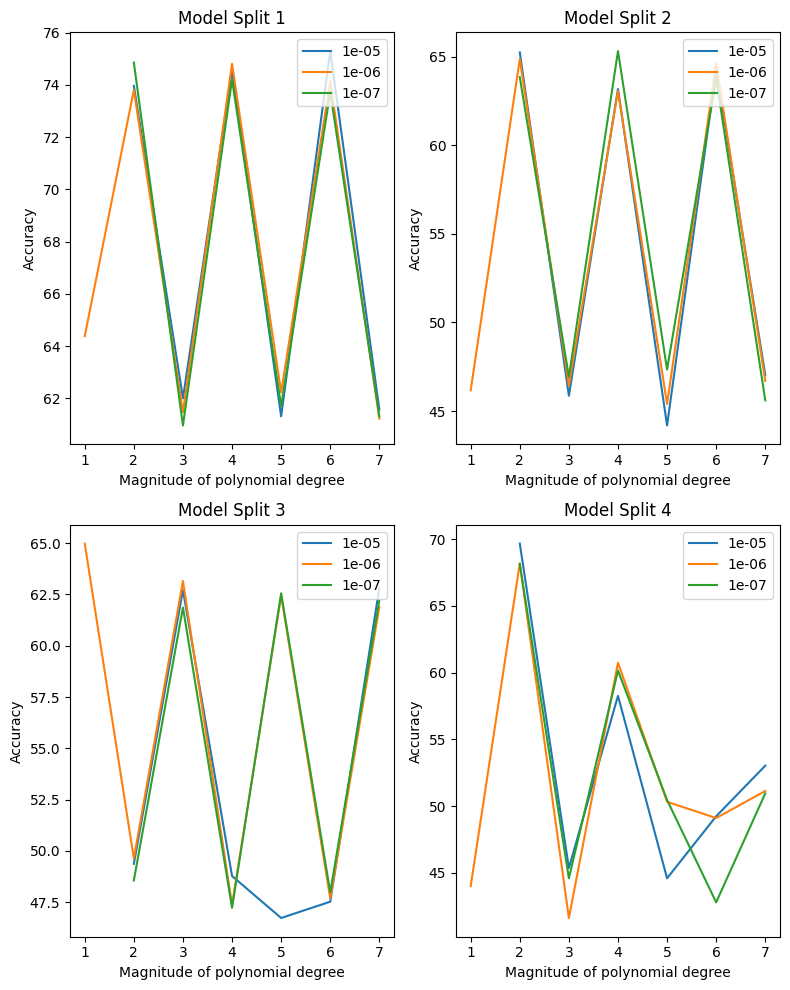

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(8,10))
# axs[0, 0].plot(x, y)
# axs[0, 0].set_title('Axis [0, 0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('Axis [0, 1]')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1, 0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1, 1]')

lambdas = {0: 1e-5, 1:1e-6, 2:1e-7}

for i, a in enumerate(accuracies):
    cur_ax = axs[i // 2, i % 2]
    for idx, v in enumerate(a):
        cur_ax.plot(*zip(*a[idx].items()), label=f'{lambdas[idx]}')
        cur_ax.set_xlabel('Magnitude of polynomial degree')
        cur_ax.set_ylabel('Accuracy')
        cur_ax.set_title(f'Model Split {i+1}')
        cur_ax.legend(loc="upper right")

fig.tight_layout()

    
plt.show()